## Assignment on Classification


## 

### Do the following in the iris dataset
### 1. Read the dataset to python environment
### 2. Do the necessary pre-processing steps
### 3. Find out which classification model gives the best result (also do random forest algorithm)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Read the dataset to python environment

In [2]:
# Read the Iris.excel file into dataframe.
data = pd.read_excel(r'C:\Users\Arathi\Downloads\iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# shape of the dataset
data.shape

(150, 5)

In [6]:
# to disply stats about data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
 
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# to display no.of samples on each class 
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

### 2. Do the necessary pre-processing steps

#### preprocessing the dataset

In [13]:
# check for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

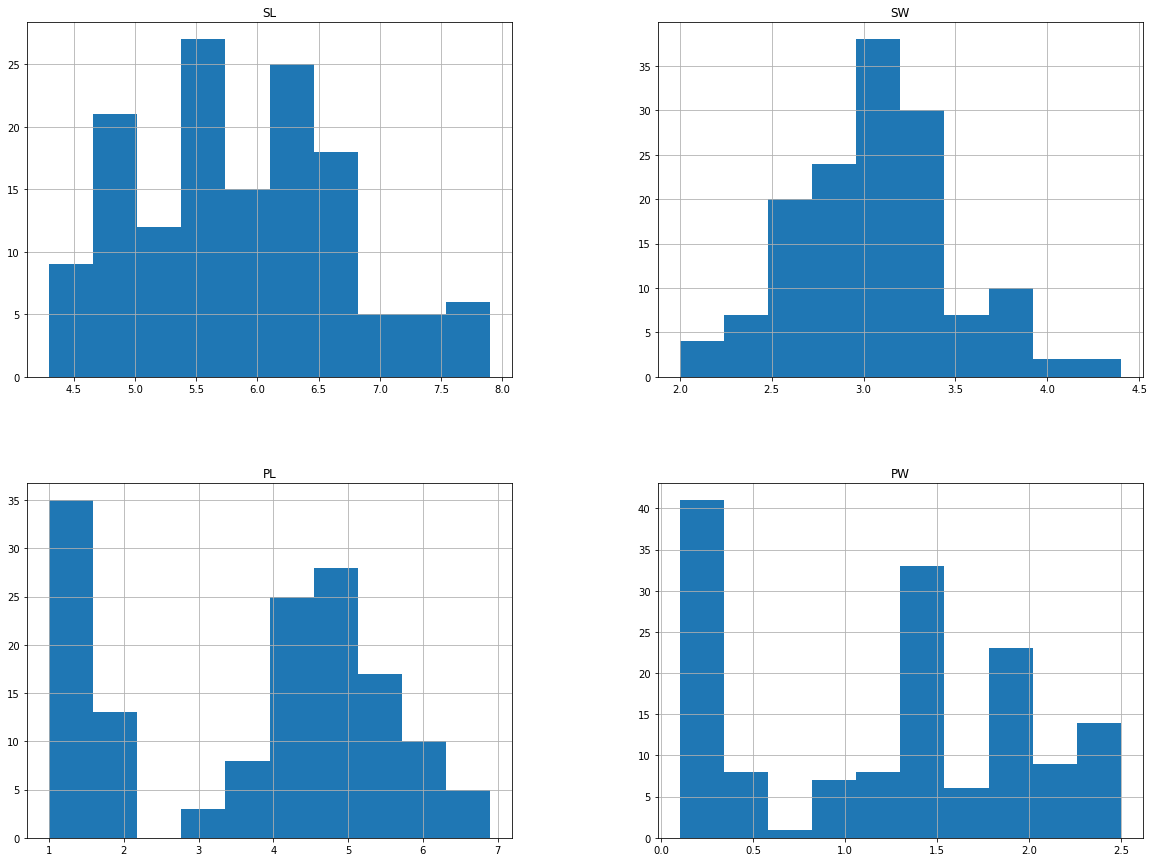

In [14]:
# plot histogram of Sl,SW,PL,PW
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [15]:
# fill the null values using mean
SL_mean = data['SL'].mean()
data['SL'] = data['SL'].fillna(SL_mean)

In [16]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [17]:
# fill the null values using mean
SL_mean = data['SW'].mean()
data['SW'] = data['SW'].fillna(SL_mean)

In [18]:
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [19]:
# fill the null values using median
PL_median= data['PL'].median()
data['PL'] = data['PL'].fillna(PL_median)

In [20]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [21]:
# applying label encoding 

#### Label Encoder

In [22]:
# classification is object dtype so changes in numericl dype.here we use label encoder.

In [23]:
# importing model for label encoder 
from sklearn.preprocessing import LabelEncoder

In [24]:
# create instance
Label_encoder = LabelEncoder()
data['Classification'] = Label_encoder.fit_transform(data['Classification'])

In [25]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [26]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


In [27]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

#### Applying classification on the train data and predicting using x_test

In [28]:
# importing library

from sklearn.model_selection import train_test_split
# train-70
# test-30

In [29]:
colmn = ['SL', 'SW', 'PL', 'PW']

In [30]:
# split into x and y variable ( x=feature - y=target)

x = data[colmn]
y = data['Classification']

In [31]:
 # splitting the data into training and testing set

x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                     test_size=0.30,
                                                     random_state=42)

In [32]:
x_train.head()

,SL,SW,PL,PW
81,5.5,2.4,3.70,1.0
133,6.3,2.8,5.10,1.5
137,6.4,3.1,5.50,1.8
75,6.6,3.0,4.40,1.4
109,7.2,3.6,4.35,2.5


In [33]:
x_test.head()

,SL,SW,PL,PW
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [34]:
y_train.head()

81     1
133    2
137    2
75     1
109    2
Name: Classification, dtype: int32

In [35]:
y_train.value_counts()

1    37
2    37
0    31
Name: Classification, dtype: int64

In [36]:
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: Classification, dtype: int32

### 3. Find out which classification model gives the best result (also do random forest algorithm)


#### LogisticRegression

In [37]:
# creating a logistic regression model

In [38]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [39]:
### creating an instance of the logistic regression
logit_model = LogisticRegression(max_iter=5000)
# model training
logit_model.fit(x_train,y_train)
# let's make a prediction
y_pred_logit = logit_model .predict(x_test)

In [40]:
y_pred_logit # predicted values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [41]:
y_test # actual data

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: Classification, dtype: int32

In [42]:
# evaluate our model


In [43]:
# importing confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
confusion_matrix(y_test,y_pred_logit)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [45]:
# print metric to get performance
print('Accuracy:', accuracy_score(y_test,y_pred_logit)*100)

Accuracy: 97.77777777777777


## 

#### KNN-k-Nearest Neighbors

In [46]:
# creating a  KNeighborsClassifier model

In [47]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
metric_k = []          # create an empty list

for k in range(5,16):
    knn =  KNeighborsClassifier(n_neighbors=k)       ## creating an instance of the knn
    knn.fit(x_train,y_train)                 # fiting the model
    y_pred_knn = knn.predict(x_test)                ## let's make a prediction
    acc = accuracy_score(y_test,y_pred_knn)        # calculate the accuracy
    metric_k.append(acc)                  # appended to the list of value

In [49]:
metric_k

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

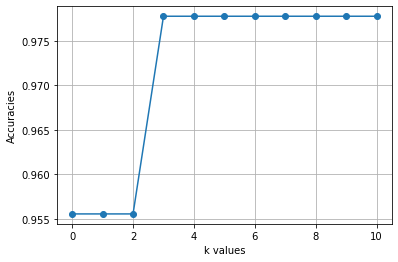

In [50]:
plt.plot(metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [51]:
knn =  KNeighborsClassifier(n_neighbors=3) # take k = 3      
knn.fit(x_train,y_train)       #fitting           
y_pred_knn = knn.predict(x_test)          

In [52]:
## evaluate our model
print('Accuracy:',accuracy_score(y_test,y_pred_logit)*100)

Accuracy: 97.77777777777777


In [53]:
confusion_matrix(y_test,y_pred_knn)

array([[18,  1,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

## 

#### Decision Tree classifier

In [54]:
# creating a Decision Tree classifier model

In [55]:
#  build Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()  # creating an instance of the  DecisionTreeClassifier
dtc.fit(x_train, y_train)       # model training 
y_pred = dtc.predict(x_test)    # make prediction

In [56]:
## evaluate our model
accuracy_score(y_test,y_pred_logit)*100

97.77777777777777

## 

#### Random Forest Classifier

In [57]:
# Build Random Forest Classifier

In [58]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier  
# creating an instance
R_F_classifier= RandomForestClassifier()  
# model training
R_F_classifier.fit(x_train, y_train) 
# let's make a prediction
y_pred = R_F_classifier.predict(x_test)

In [59]:
## evaluate our model
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 100.0


#### RandomForestClassifier model got 100% accuracy.The rest of the models got 97.77 accuracy.

#### RandomForestClassifier model is working better than Decision Tree classifier,KNeighborsClassifier,LogisticRegression models.

## 

####  we apply min max scaller or stander scaller for 0-1 

In [60]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [61]:
# build the scaler model
minmax = MinMaxScaler(feature_range=(0,1))

In [62]:

data = minmax.fit_transform(data)

In [63]:
data1 = pd.DataFrame(data,columns=['SL', 'SW', 'PL', 'PW','Classification'])

In [64]:
data1.describe() # min. max. values coverting to 0,1

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.471186,0.457778,0.500000
std,0.224578,0.175785,0.293123,0.317984,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.531250,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### creating a logistic regression model

In [65]:
### creating an instance of the logistic regression
logit_model = LogisticRegression(max_iter=5000)
# model training
logit_model.fit(x_train,y_train)
# let's make a prediction
y_pred_logit = logit_model .predict(x_test)

In [66]:
# print metric to get performance
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 100.0


####  creating a Decision Tree classifier model

In [67]:
#  build Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()  # creating an instance of the  DecisionTreeClassifier
dtc.fit(x_train, y_train)       # train 
y_pred = dtc.predict(x_test)    # make prediction

In [68]:
# print metric to get performance
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 100.0


####  creating a  RandomForestClassifier model

In [69]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier  
# creating an instance
R_F_classifier= RandomForestClassifier()  
# model training
R_F_classifier.fit(x_train, y_train) 
# let's make a prediction
y_pred = R_F_classifier.predict(x_test)

In [70]:
# print metric to get performance
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 100.0


### 100% accuracy was obtained for all classification models such as RandomForestClassifier, Decision Tree classifier,KNeighborsClassifier and LogisticRegression after MinMax scaling..

### all classification models gives the best results.